In [26]:
import pandas as pd
import pandas.plotting
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline


# A multivariate graph displays the relationship between multiple variables in a single graph. It helps identify patterns, trends, correlations, outliers, and allows for comparative analysis. It provides a visual representation of how variables change over time or other independent factors. It aids in data interpretation, communication, and gaining insights from complex datasets.

In [27]:
file = r"C:\Users\Sidharth\Desktop\798Q\data.csv.csv"
df=pd.read_csv(file,index_col=0)

In [28]:
data=df.copy()

In [29]:
data=data[:-3]
data

,From,to,pm10,pm2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
Sn,,,,,,,,,,,,
1,01-02-2023 00:00,01-02-2023 00:15,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4
2,01-02-2023 00:15,01-02-2023 00:30,95.0,35.0,NaN,88.0,55.1,0.33,NaN,18.3,27.1,0.4
3,01-02-2023 00:30,01-02-2023 00:45,95.0,35.0,NaN,87.7,55.2,0.38,NaN,19.7,24.9,0.4
4,01-02-2023 00:45,01-02-2023 01:00,122.0,34.0,NaN,88.9,55.7,0.38,NaN,21.3,21.9,0.4
5,01-02-2023 01:00,01-02-2023 01:15,122.0,34.0,NaN,90.0,55.8,0.38,NaN,22.3,16.7,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
8636,01-05-2023 22:45,01-05-2023 23:00,19.0,11.0,17.9,100.0,67.8,0.63,10.0,10.7,26.1,0.1
8637,01-05-2023 23:00,01-05-2023 23:15,19.0,11.0,17.9,100.0,67.7,0.57,10.0,10.4,30.9,0.1
8638,01-05-2023 23:15,01-05-2023 23:30,19.0,11.0,19.6,100.2,69.2,0.58,9.9,10.5,29.6,0.1


Analyzing multivariate time series data that contains NaN (missing) values replaced with zero values requires special attention to ensure accurate interpretation and meaningful analysis. Here's an overview of the theory behind analyzing such multivariate time series:

Consider the nature of missing data: Missing data can occur in multivariate time series due to various reasons such as measurement errors, sensor failures, or data collection issues. Replacing missing values with zeros assumes that the missing values indicate zero measurements rather than true zero values. It is essential to understand the context and implications of replacing missing values with zeros for accurate analysis.

Data preprocessing: Before analyzing the multivariate time series, it is crucial to preprocess the data properly. This includes handling missing values, transforming the data if necessary, and ensuring consistency in the data format. Replacing NaN values with zeros is just one approach to handle missing data, but it may not always be the most appropriate. Consider alternative methods such as interpolation or imputation techniques based on the specific characteristics of your data.

Interpretation of zero values: When missing values are replaced with zeros, it is important to interpret zero values correctly. Zero values in the time series can represent either actual zero measurements or missing values that were replaced with zeros. zero values may impact the analysis results, particularly in calculations involving averages, trends, and statistical measures.

Visual exploration: Visualizing the multivariate time series is an effective way to understand its behavior. By plotting the data, you can observe patterns, trends, and relationships between variables. However, be cautious when interpreting the zero values in the plots, as they may not reflect true zero measurements.

Analysis techniques: When analyzing multivariate time series with replaced zero values, be aware of the potential biases introduced by the replacement. The presence of zero values can affect various analysis techniques such as correlation analysis, regression modeling, or time series forecasting. Consider the implications of zero values in the specific analysis techniques used and adjust the interpretation accordingly.

Sensitivity analysis: It is important to perform sensitivity analysis to assess the impact of replacing missing values with zeros on the analysis results. This involves comparing the outcomes obtained with zero replacements to alternative approaches, such as imputation methods or excluding the affected time periods altogether. Sensitivity analysis helps evaluate the robustness of the findings and provides insights into the potential biases introduced by the zero replacements.

Overall, analyzing multivariate time series data with NaN values replaced by zero values requires careful consideration of the implications. It is recommended to explore alternative methods for handling missing data and perform sensitivity analysis to ensure the validity of the analysis results.

In [30]:
NO='NO'
data[NO].fillna(0,inplace=True)
NO2='NO2'

data[NO2].fillna(0, inplace=True)
NOX='NOX'
avg_NOX = data[NOX].mean()
data[NOX].fillna(0, inplace=True)
CO='CO'
avg_CO = data[CO].mean()
data[CO].fillna(0, inplace=True)
SO2='SO2'
avg_SO2 = data[SO2].mean()
data[SO2].fillna(0, inplace=True)
NH3='NH3'
avg_NH3 = data[NH3].mean()
data[NH3].fillna(0, inplace=True)
Ozone='Ozone'
avg_Ozone = data[Ozone].mean()
data[Ozone].fillna(0, inplace=True)
Benzene='Benzene'
avg_Benzene = data[Benzene].mean()
data[Benzene].fillna(0, inplace=True)
pm10='pm10'
avg_pm10 = data[pm10].mean()
data[pm10].fillna(0, inplace=True)
pm25='pm2.5'
avg_pm25 = data[pm25].mean()
data[pm25].fillna(0, inplace=True)

In [31]:
 data.drop(['to'], axis=1, inplace=True)

In [32]:
data.columns


Index(['From', 'pm10', 'pm2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3',
       'Ozone', 'Benzene'],
      dtype='object')

In [33]:
data['From'] = pd.to_datetime(data['From'], format = '%d-%m-%Y %H:%M')

In [34]:
data['From']

Sn
1      2023-02-01 00:00:00
2      2023-02-01 00:15:00
3      2023-02-01 00:30:00
4      2023-02-01 00:45:00
5      2023-02-01 01:00:00
               ...        
8636   2023-05-01 22:45:00
8637   2023-05-01 23:00:00
8638   2023-05-01 23:15:00
8639   2023-05-01 23:30:00
8640   2023-05-01 23:45:00
Name: From, Length: 8640, dtype: datetime64[ns]

In [35]:
data.set_index(['From'], inplace=True)

<Axes: xlabel='From'>

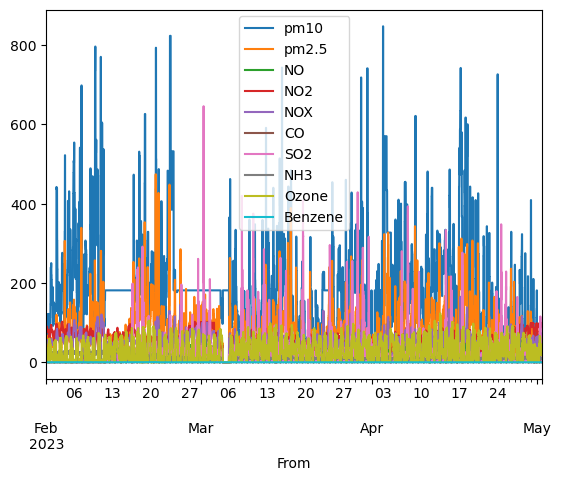

In [36]:
data.plot()